## Lecture 1
**Arthur Samuel (made the machine learning term popular)
His definition: Field of study that gives the computers the ability to learn without being explicitly programmed. 
Started with the example of checkers.

In simple words, `machine learning is about teaching machines to recognize patterns in data and make decisions or predictions based on those patterns.`

**Supervised learning**
Given a dataset (X,y), understand the mapping from X to y.

`Regression problem` 
Regression helps us understand how the value of one variable changes as the value of another variable changes.
The goal of regression analysis is to find the best-fitting line (or curve) that describes the relationship between the variables, allowing us to make predictions about the dependent variable based on the values of the independent variables.

`Classification problem` 
It involves categorizing data points into predefined classes or categories based on their features. The goal of classification algorithms is to learn a mapping from input features to a target label or class.

**Unsupervised learning**
Given a dataset with no labels (only X), find some insights from the data.
In unsupervised learning, the algorithm explores the data and tries to find hidden structure or relationships among the variables.

Unlike supervised learning, where the algorithm is provided with labeled data (input-output pairs) and learns to predict the output given the input, unsupervised learning works with unlabeled data and aims to uncover underlying patterns or groupings within the data.


**Reinforcement learning**
Reinforcement learning is a type of machine learning where an agent learns to make decisions by interacting with an environment. The agent learns to achieve a goal or maximize a reward by taking actions and receiving feedback from the environment. This feedback, typically in the form of rewards or penalties, helps the agent to adjust its behavior over time to achieve better outcomes. Reinforcement learning algorithms are inspired by behavioral psychology principles, where an agent learns through trial and error, gradually refining its decision-making strategy to achieve optimal results.



Regression
- Predict a number
- infinitely many possible outputs

Classification 
- predict categories
- small number of possible outputs

## Lecture 2 (Linear regression and gradient descent)

**We are taking the example of predicting the house prices.

In supervised learning, we have a `training set` which we feed to the `learning algorithm`. The job of the learning algorithm is to output a function that make prediction about the house prices. Lets call that function `hypothesis` which takes an input (size of house, here) and gives the output (price)

The form of hypothesis function for a linear regression (with one feature is )

 $h_\theta(x) = \theta_0 + \theta_1 x $
    
with multiple features like ( information about location, number of rooms, ...)
    
 $h(x_1, x_2, ...) = \theta_0 + \theta_i x_i  = \sum_{i=0}^{i} \theta_i x_i $  

where $x_0 = 1$  

- $\theta$ are the learning parameters. 
- m is the number of training example (rows in dataset).
- x is input/features 
- y is output/tagets
- (x,y) is training example
- Notation used : $(x^i_j, y^i)$ where i is the row number and j is the feature 
- n is the number of features

**The question is how do you choose the value of these parameters?

We want the hypothesis to predict the values of houses whose values we know as close as possible to their real values. More formally, in linear regression, we want to minimize the cost function $J(\theta)$
        
$J(\theta) = \frac{1}{2}(h_\theta(x) - y)^2$

**NOTE:** Atm, we are working with the squared error which is related to the Gaussian family, but we will slowly generalise it.

Now, we need an algorithm, which minimizes the J(w), the cost function. Here, we will be working with `Gradient Descent`
- Start with some $\theta$ 
- keep changing $\theta$ to reduce $J(\theta)$
- Lets say we have 2 features, then we will have 3 learning parameters: (bias + 2 weights) and now the task would be to find a value from the 3D vector of learning parameters. So for any random point of learning parameter space, we would look around and find in which direction we will take a baby step, from which we get downhill as early as possible. We keep on repeating this baby step process until the $J(\theta)$ is minimized.

Formalism:

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$

where $\alpha$ is learning rate. And repeat this formalism until convergence . 

On feeding the expression of $J(\theta)$, we get

$\theta_j := \theta_j - \alpha (h_\theta(x) - y) x_j$

This wil happen over the value of entire dataset, so proper expression would be:

$\theta_j := \theta_j - \alpha (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$

The problem with the `Batch gradient descent` would be if you have dataset with millions of rows, then you have to scan through the entire dataset to take one baby step for updating the parameters which will reduce the computational speed. The `alternative` of batch gradient descent is `Stochastic gradient descent`

Repeat: 

{

$\quad$  for i = 1 to m {
    
   $\quad \quad \theta_j := \theta_j - \alpha (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$
    
$\quad$   }
   
}

i.e **for every feature, we update the weights using one training example** The naive idea would be to fit one example, and take a tiny step, then fit one other training example, and make a tiny step. So in practice, it would be very chaotic steps, but on average it would heads towards global minima. 

Even if we are fitting one value at a time, and having very chaotic path, we can tweak the learning rate, so that the oscillations of these weight update reduces.



**`Normal equation`**

A very special case which only works for linear regression, where only with one step we reach the optimal values of the parameters.

The "normal equation" is a mathematical expression used in the context of linear regression to find the coefficients of the linear model that best fits a given set of data points. 

In linear regression, we typically have a set of input features (independent variables) $x_1, x_2, ..., x_n $ and a corresponding set of output values (dependent variable) $y $. We want to find the coefficients $\theta_0, \theta_1, ..., \theta_n $ such that our linear model $h_{\theta}(x) $ best predicts the output values.

The normal equation provides a closed-form solution to this problem:

$ \theta = (X^T X)^{-1} X^T y $

Where:
- $\theta $ is the vector of coefficients.
- $X $ is the matrix of input features, where each row represents one data point and each column represents one feature.
- $y $ is the vector of output values.

This equation directly computes the values of $\theta$ that minimize the sum of squared errors between the predicted values $h_{\theta}(x) $ and the actual values $y$.

The normal equation approach is computationally efficient for small to medium-sized datasets. However, for very large datasets, it can be slow because of the matrix inversion operation and may not be the most efficient method. In those cases, gradient descent or other optimization algorithms are often used instead.


## Lecture 3 (Locally weighted and logistic regression)

`Parametric learning algorithm:` fit fixed set of parameters (like weights and biases)

`Non-parameteric learning algorithm:` amount of data/parameter you need to keep grows linearly with size of data. This is used by locally weighted regression. 


In `locally weighted regression`, we choose a small sample of data around which we want to predict the value. Or in other words, more weightage is given to points in the neighbourhood. It is a decent algorithm when the dataset contains less features but fairly large number of points. 

Fit $\theta$ to minimize :

$\sum_{i=1}^{m} w^(i)\big(y^{(i)} - \theta x^{(i)}\big)^2$

where $w^{(i)}$ is a `weighing` function, and is given as

$w^{(i)} = \exp\Big(\frac{-(x^{(i)} - x)^2}{2\tau^2}\Big)$

and $x$ is the point where you want to make prediction and $\tau$ is the `bandwidth` (width) of Guassian looking fit.


**Probablistic Interpretion** 
Why do we always take least square and not like 1/4th power of error while minimizing the cost function?

### NOTE: 
from now on we will always use a transpose on coefficent matrix $\theta$ to enable proper matrix multiplication.
Lets assume we have:

$ y^{(i)} = \theta^T x^{(i)} + \epsilon^{(i)} $ 

where $\epsilon^{(i)}$ is the error term taking into account the unmodelled effect (random noise) for eg mood of the seller or something like that, and we assume it to have a Gaussian (or Normal) distribution  with mean 0 and variance $\sigma^2$.

$\epsilon^{(i)} ~ N(0, \sigma^2)$

Its probability density is given as:

$P(\epsilon) = \frac{1}{\sqrt{2\pi \sigma^2}} exp\Big(\frac{(\epsilon^{(i)})^2}{2\sigma^2}\Big)$

And we are also assuming $\epsilon$ is Independently and identically (IID) distributed - error term from one house differs from other house (here house price prediction example)


$P\big(y^{(i)} | x^{(i)}, \theta \big) =  \frac{1}{\sqrt{2\pi \sigma^2}} exp\Big(\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2\sigma^2}\Big)$

Under the asssumptions we made, the `likelihood of parameter` $\theta$ $\mathcal{L}(\theta)$ is the probability of data

 $\mathcal{L}(\theta) = P(y | x; \theta) = \prod_{i=1}^{m} P(y^{(i)} | x^{(i)}; \theta)$


**We use the term `probability of data` if we are keeping the data fixed and we use `likelihood of parameter` if we are keeping parameters fixed.** Also remember they both evaluate to same thing.

$l(\theta) = \log \mathcal{L}(\theta)$ is the `log likelihood`. Putting the values, it evaluates to 

$l(\theta) = m \log \frac{1}{\sqrt{2\pi \sigma^2}}  - \sum_{i=1}^m \frac{(y^{(i)} - \theta^T x^{(i)})^2}{2\sigma^2}$

Now the way to choose $\theta$ is to maximize the likelihood or log likelihood.

Overall, we want to minimize this term while choosing $\theta$ ($\sigma$ is just a number we can set it to 1 here)

$\frac{1}{2} \sum_{i=1}^m (y^{(i)} - \theta^T x^{(i)})^2$

which is `nothing but the cost function` $J(\theta)$.


**So, in nutshell, we have a defined form of cost function based on the maximum likelihood estimation while assuming that the error terms are Gaussian and IID.**


### Classification Problem

We cant use linear regression for the classification problem. Assume, we are working with binary classification i.e the output is either 0 or 1. The algorithm used is called `Logistic regression`

So, we want $h_\theta(x) \in [0, 1]$

$h_\theta(x) = g(\theta^T x) = \frac{1}{1+ e^{-\theta^T x}}$

where $g(z) = \frac{1}{1+ e^{-z}} $ is called the `sigmoid` or the `logistic` function. The probalistic expression for classification problem where y can only take value 0 and 1 is given as

$P(y | x; \theta) = h_\theta(x)^y (1 - h_\theta(x))^{1-y}$

### NOTE:

we can also think about finding the parameters in terms of maximizing the log likelihood. 

$\theta_j := \theta_j + \alpha \frac{\partial }{\partial \theta_j} l(\theta)$

and for this, we will be using `gradient ascent` instead of gradient descent. **There is no equivalent of Normal equation for logistic regression**

### Newton's Method: 

Instead of taking tinnie tiny step, one can take larger step to find the value of $\theta$ if and only if the $\theta$ to begin with is close to the solution we are looking for.

If $\theta$ is a row matrix, then the Newton method is given as:

$\theta := \theta + H^{-1} \nabla_\theta l $

where H is the `Hessian matrix` given as

$H_{ij} = \frac{\partial^2 l}{\partial \theta_i \theta_j} $

Works well,  if the number of features is small. Large number of features will give to large Hessian matrix which will increase the computational cost.


## Lecture 4: Perceptron and Generalised Linear Model

So far, we saw that both the linear regression and logistic regression have similar update rule

 $\theta_j := \theta_j - \alpha \big(h_\theta(x)^{(i)} - y^{(i)}\big) x_j^{(i)}$

and $h_\theta(x) = g(\theta^Tx)$ varies based on the choice of problem. For eg,

- Sigmoid function $g(\theta^Tx) = \frac{1}{1+e^{-\theta^T x}}$ - output probability between 0 and 1
- Step function $g(\theta^Tx) = 1 ~~\theta^Tx > 0 ~\rm{else} ~0$ - output binary values 


###  Perceptron algorithm
The perceptron algorithm was traditionally used in the classification problem. You start by classfiying one point, and draw the learning boundary. Then take the next point, and re-draw the learning boundary by adding or subtracting the input vector to the previous weights. It's a linear classifier that learns a weight vector to classify inputs into two classes based on a step function. Here's a short overview:

Perceptron algorithm is used when the data is `linearly separable`.

$\theta_i = \theta_i + \eta d x_i$

where d is $+1/-1$ based on whether the misclassified point should have been above/below the classification line.

`Note:` If the dataset is not linearly separable then see if it can be converted into that form by some mahematical transformation. For eg, if you have a dataset where the boundary will take a form of circle, then one convert the cartesian coordinate into polar coordinates, and then used the perceptron algorithm.
 
The perceptron algorithm works well for linearly separable data but may not converge for data that are not linearly separable. Additionally, it's a single-layer neural network and does not work for more complex problems that require non-linear decision boundaries.


### PDF (probability distribution function) of exponential families
The probability density function (PDF) of a member of the exponential family of distributions, which is a broad class of probability distributions, is given as 

$P(y;\eta) = b(y) \exp\big( \eta^T T(y) - a(\eta)\big)$

This general form is widely used in statistical modeling because many common distributions, such as the normal distribution, Poisson distribution, gamma distribution, etc., can be expressed in this form by appropriately choosing $b(y), T(y)$ and $\eta(y)$

Here:
- $P(y;\eta)$ denotes the PDF of the random variable $ y $ parameterized by $ \eta $, where $ \eta $ is a vector of parameters.
  
- $ b(y) $ is the base measure or base density function.
- $ \exp\left( \eta^T T(y) - a(\eta)\right) $ represents the exponential term. 
- $ \eta^T T(y) $  is often referred to as the `sufficient statistic.`
- $ a(\eta) $ is the log-partition function, also known as the cumulant function or log-normalizer. It ensures that the distribution integrates to 1 over all possible values of $ y $.

You can use the above PDF form to evaluate the value of $b(y), T(y)$ and $\eta(y)$ for a simple distribution like `Bernoulli` with $\phi$ being the probability of an event.

$P(y; \phi) = \phi^y(1-\phi)^{1-y}$

This can be rewritten as $P(y; \phi) = exp\Big(log\big( \phi^y(1-\phi)^{1-y}\big)\Big)$, with simple massaging of terms, we see that for Bernoulli PDF 
- $b(y) = 1$
- $T(y) = y$
- $\eta = \log\Big(\frac{\phi}{1-\phi}\Big) \implies \phi = \frac{1}{1+e^{-\eta}}$
- $a(\eta) = -\log(1-\phi) = -\log\Big(1-\frac{1}{1+e^{-\eta}}\Big)$


#### Properties of exponential families
- maximum likelihood of estimation (MLE) w.r.t $\eta$ is concave (gradient ascent)
    - Negative log likelihood (NLL) is convex
- Mean of distribution parameterised by $\eta$ is $E[y;\eta] = \frac{\partial a(\eta)}{\partial \eta}$
- Variance  $\rm{Var}[y;\eta] = \frac{\partial^2 a(\eta)}{\partial^2 \eta}$

### Generalized Linear Model (GLM)
These are some assumptions :
- $y|x; \theta $ ~ Exponential family
- $\eta = \theta^T x$
- $h_\theta(x) = E[y|x;\theta]$
- Learning update rule is always the same 
    $\theta_j := \theta_j - \alpha \big(h_\theta(x)^{(i)} - y^{(i)}\big) x_j^{(i)}$

**NOTE:**

- Input features are used to get the parameters of Linear model which is then fed to the Exponential Family distribution paramter to obtain the hypothesis.
 
- We have `three different parametrization`:
    - model parameters: $\theta$
    - natural paramters: $\eta$
    - canonical parameters: these are what you get from the different distribution function, like
        - $\phi$ for Bernoulli 
        - $\mu, \sigma^2$ for Gaussian
- We are always learning the $\theta$ parameters and not the others
- If we have a binary classification, we use Bernoulli. 
- If we have continuous data that are symmetrically distributed around a mean, we use Gaussian
- If we have to model counts of events occurring within a fixed interval, we use Poisson

### Softmax regression 
(also has a GLM interpretation, but avoiding it for the moment). Uses cross entropy for multi-class classification.
Lets say we have $k$ number of classes and each class has it own parameters
So, the hypothesis function will output probability of all the classes. 


Sure, here's a step-by-step procedure for implementing softmax regression:
1. **Model Definition**:
   - Define the softmax regression model architecture:
     - Input layer: Features of the data.
     - Output layer: One node for each class, with softmax activation function.
     - Parameters: Weight matrix $ \mathbf{W} $ and bias vector $ \mathbf{b} $ for each class.

2. **Forward Propagation**:
   - Compute the logits for each class $ k $ using the linear transformation:
     $ z_k = \mathbf{w}_k^T \mathbf{x} + b_k $
   - Calculate the softmax probabilities for each class using the logits:
     $ P(\hat{y}=k|\mathbf{x}) = \frac{\exp(z_k)}{\sum_{j=1}^{K} \exp(z_j)} $

3. **Loss Computation**:
   - Calculate the cross-entropy loss between the predicted probabilities and the true labels:
   
     $\rm{CE}(P, \hat{P}) = -\sum_{y \in K} P(y) \log P(\hat{y}) $

4. **Backpropagation**:
   - Compute the gradients of the loss function with respect to the model parameters ($ \mathbf{W} $ and $ \mathbf{b} $) using the chain rule and gradient descent:
     - Update the weights and biases using the gradients and a chosen optimization algorithm (e.g., stochastic gradient descent, Adam).


# Lecture 5: Gaussian Discriminant Analysis (GDA) and Naive Bayes


## Generative Learning Algorithm
Instead of finding separation boundary, it create a model for different classes in the train dataset, and when a new test data comes, it compares and sees which model does it fit well and then classify. 

Generative learning algorithms are a class of machine learning algorithms that aim to model the underlying probability distribution of the data. Unlike discriminative algorithms, which learn the boundary between classes directly, generative algorithms learn how the data is generated.

**A discriminative Algorithm learn $P(y|x)$ and a generative learning algorithm learns $P(x|y)$ i.e how does features look like when they are in a particular class.** This involves learning the underlying patterns and correlations present in the data. It also learns about the $P(y)$ which is called the `class Prior` which refers to the probability of each class occuring in the dataset without observing any features. 

Now using `Bayes rule`. (Here, we have binary classification):

$P(y = 1|x) = \frac{P(x|y = 1) P (y = 1)}{P(x)}$

where 
$P(x) = P(x|y=1)P(y=1) + P(x|y=0)P(y=0) $


### Gaussian Discriminant Analysis (GDA)
The first generative learning algorithm that we’ll look at is Gaussian discriminant analysis (GDA). In this model, we’ll assume that p(x|y) is distributed according to a multivariate normal distribution. Here, we are dropping the bias term that is no need of putting $x_0 = 1$ while solving the linear regression problem. Let's assume P(x|y) is Gaussian,.


The probability density function (PDF) of a multivariate Gaussian distribution is given by:

$ P(\mathbf{x} | y; \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right) $

Where:
- $ \mathbf{x} $ is a $ d $-dimensional vector representing the random variables.
- $ \boldsymbol{\mu} $ is the mean vector of length $ d $.
- $ \boldsymbol{\Sigma} $ is the covariance matrix of size $ d \times d $.
- $ | \boldsymbol{\Sigma} | $ represents the determinant of the covariance matrix which describes how the variables in $ \mathbf{x} $ are correlated with each other.

In this equation:
- $ (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) $ is the `Mahalanobis distance`, which measures the distance between $ \mathbf{x} $ and $ \boldsymbol{\mu} $ weighted by the inverse of the covariance matrix.

So using GDA, we have:

$ P(\mathbf{x} | y = 0; \boldsymbol{\mu_0}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu_0})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu_0}) \right) $

$ P(\mathbf{x} | y = 1; \boldsymbol{\mu_1}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu_1})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu_1}) \right) $

and
$P(y) = \phi^y(1-\phi)^{(1-y)}$ 

So overall, we have these parameter for binary classifications: $\mu_0, \mu_1, \Sigma, \phi$.
If we use the maximum likelihood estimation (do the whole procedure as explained in previous lecture), then we get the following values of the parameters:

$\phi$ is the probability of getting 1

$\phi = \frac{\sum_{i=1}^m \mathbb{I}\{y^{(i)} = 1\}}{m}$ 

#### NOTE:

- $\mathbb{I}$ is an `indicator function`
 
- The indicator function takes a condition as input and outputs 1 if the condition is true, and 0 otherwise. Mathematically, it is defined as:

- $ \mathbb{I}(A) = \begin{cases} 1 & \text{if } A \text{ is true} \\ 0 & \text{if } A \text{ is false} \end{cases} $

$\mu_0 = \frac{\mathbb{I}\{y^{(i)}=0\} x^{i} }{ \mathbb{I}\{y^{(i)}=0\} }$ := sum of feature vector for all the examples with y=0

$\mu_1 = \frac{\mathbb{I}\{y^{(i)}=1\} x^{i} }{ \mathbb{I}\{y^{(i)}=1\} }$ 

$\Sigma = \frac{1}{m} \sum_{i=1}^m \big(x^{(i)} - \mu_{y^{(i)}} \big) \big(x^{(i)} - \mu_{y^{(i)}} \big)^T$

We can use these parameters to predict the most likely class label, 
$\rm{argmax} P(y|x) = \rm{argmax}P(x|y) P(y)$

#### NOTE:
- Here, we have dropped the denominator of Naive Bayes while writing the probability as you can think about it as nothing more than a normalization 
- `argmax` is a function that returns the input value that maximizes a given function. For eg argmax(z-5)^2 will return 0, as input 0 would maximize the output 



## Comparison of GDA to logistic regression 
The GDA model has an interesting relation to the logistic regression. If we plot the probability $P(y=1|x)$ for all the x-points, we will see that it takes the shape of Sigmoid function. 
So, we can say 

$P(y|x; \mu_0, \mu_1, \phi, \Sigma) = \frac{1}{1+e^{-\theta^Tx}}$

where $\theta$ is some function of $(\mu_0, \mu_1, \phi, \Sigma). But this form, is exactly the form that the logistic regression - a discriminative model takes. Even though they eventually use the same mechanics (generative model gets it from calculation and discriminative model uses it as it), they end up giving a different decision boundary based on the choice of parameters, resulting in two different decision boundary.

Again, for Gaussian descriminant analysis (GDA) assumes:
- $ x|y=0 \sim \mathcal{N}(\mu_0, \Sigma)$
- $ x|y=1 \sim \mathcal{N}(\mu_1, \Sigma)$
- $y \sim \rm{Bernouli}(\phi)$

Now for Logistic regression we have:
- $P(y =1 | x) = \frac{1}{1+e^{-\theta^Tx}}

We saw that if $P(x|y)$ is A multivariate gaussian (with same $\Sigma$), then $P(y|x)$ necessarily follows a logistic function. The converse, however, is not true; i.e., $P(y|x)$ being a logistic function does not imply $P(x|y)$ is multivariate gaussian. This implies GDA has a a stronger set of assumption and would be more superior to logistic regression even for a smaller dataset if we have `right assumptions to begin with`.

#### NOTE:
- FUNFACT: if we take Poisson distribution instead of Gaussian distribution
$ x|y=0 \sim \rm{Poisson}(\lambda_0)$
$ x|y=1 \sim \rm{Poisson}(\lambda_1)$
then also we get the Sigmoid function. 
- We can also generalise it, if probabilities of classes $P(x|y=k)$ comes from the exponential family of distribution and they are expressed in terms of natural paramters, then they will always follow a logistic function. 
- This is what leads to failure of GDA, because if we begin with Poisson and the data was Gaussian,then we have bad set of assumption and hence will lead to poor fit.

-  Logistic regression makes weaker assumptions, and is significantly more robust to deviations from modeling assumptions. Specifically, when the data is indeed non-Gaussian, then in the limit of large datasets, `logistic regression will almost always do better than GDA.`

## Naive Bayes
**Problem: how to deal with identifying spam(1) and nonspam(0) mail?**

In GDA, the feature vectors $x$ were continuous, real-valued vectors. Let’s now talk about a different learning algorithm in which the $x_i$ are discretevalued. Let’s say we have a training set (a set of emails labeled as spam or nonspam). We’ll begin our construction of our spam filter by specifying the features $x_i$ used to represent an email.

Here, we will use one-hot encoding and represent an email via a feature vector whose length is equal to the number of words in the dictionary. Specifically, if an email contains the i-th word of the dictionary, then we will set $x_i = 1$; otherwise, we let $x_i=0$

Lets say we have 10,000 words in dictionary, then the feature vector is a 10,000-dimensional vector of 0’s and
1’s, which can be expressed as $x \in \{0,1\}^{10,000}$. Now we want to model, $P(x|y)$ and $P(y)$, and for the binary classification problem, we will have $2^{10,000}$ different possible values of $x$. This is clearly too many parameters.

So, we will assume $x_i$ are conditionally independent given y. y. This assumption is called the `Naive Bayes` (NB) assumption, and the resulting algorithm is called the `Naive Bayes classifier`. 

$P(x_1,x_2,x_3, ...x_10000|y) = P(x_1|y)P(x_2|y, x_2)P(x_3|y, x_1, x_2)...P(x_{10000}|y, x_1, x_2, ...)$

$\quad \quad\quad \quad = p(x_1 | y) p(x_2 | y) p(x_3 | y) \ldots p(x_{10000} | y)$

$\quad \quad\quad \quad= \prod_{i=1}^{10000} p(x_i | y)$


So what we are assuming from going from first equality to second equality is $x_1, x_2, ...$ are conditionally independent given y  For instance, if y = 1 means spam email; “buy” is word 2087 and “price” is word 39831; then we are assuming that if I tell you y = 1 (that a particular piece of email is spam), then knowledge of x2087 (knowledge of whether “buy” appears in the message) will have no effect on your beliefs about the value of x39831 (whether “price” appears)


The parameters of our model are:
- $\phi_{j|y=1} = P(x_j=1|y=1)$ := The probability of word $j$ appearing in mail if it is spam 
- $\phi_{j|y=0} = P(x_j=1|y=0)$ := The probability of word $j$ appearing in mail if it is non-spam 
- $\phi = P(y=1)$ := Class prior i.e without looking at the features what is the probability that the new email is spam.

With this, we will write the joint likelihood:

$\mathcal{L}(\phi_y, \phi_{j|y}) = \prod_{i=1}^m P(x^{(i)}, y^{(i)}; \phi_y, \phi_{j|y})$

and maximum likelihood estimation (MLE) will give:
- $\phi_y = \frac{\sum_{i=1}^m \mathbb{I}\{y^{(i)}=1 \}}{m}$ := fraction of spam email
- $\phi_{j|y=1} = \frac{ \sum_{i=1}^m \mathbb{I}\{x^{(i)}_j=1, y^{(i)} = 1 \} }{ \sum_{i} \mathbb{I}\{y^{(i)} =1\} }$ := chances of word j appearing if the mail is spam
- $\phi_{j|y=0} = \frac{ \sum_{i=1}^m \mathbb{I}\{x^{(i)}_j=1, y^{(i)} = 1 \} }{ \sum_{i} \mathbb{I}\{y^{(i)} =0\} }$ := chances of word j appearing if the mail is non-spam

At prediction time, 

$P(y=1|x) = \frac{ P(x|y=1) P(y=1)}{P(x|y=1)P(y=1) + P(x|y=0)P(y=0)}$

What if some of these parameters from maximum likelihood estimates i.e $\phi_{j|y=k}$ end up as zero, which is a problem. To avoid this, we can use **Laplace smoothing**.

# Lecture 6: Support Vector Machine

### Laplace Smoothing

Continuing the Naive Bayes, lets say we have our first mail from NIPS (biggest conference in Machine learning). As we have trained the model using all the data in our email box, we will get theese values to be zero 

$\phi_{j|y=1} = 0$ : j being the NIPS word in spam email

$\phi_{j|y=0} = 0$ : j being the NIPS word in non spam email

Apart from that the, the class posterior probability at the decision time would be

$P(y=1|x) = \frac{0}{0}$

This is because our algorithm doesnt know how to make a prediction for new "word" as 
$p(x_i = '\rm{NIPS}' | y)=0$


Hence in order to avoid 0/0 problem, we add one to the numerator and k (number of classes) to the denominator  maximum likelihood estimate. Here $k=2$ as it is a binary classification (spam or nonspam)

- $\phi_{j|y=1} = \frac{ \sum_{i=1}^m \mathbb{I}\{x^{(i)}_j=1, y^{(i)} = 1 \} + 1 }{ \sum_{i} \mathbb{I}\{y^{(i)} =1\} + k }$ := chances of word j appearing if the mail is spam

- $\phi_{j|y=0} = \frac{ \sum_{i=1}^m \mathbb{I}\{x^{(i)}_j=1, y^{(i)} = 1 \} + 1 }{ \sum_{i} \mathbb{I}\{y^{(i)} =0\} + k }$ := chances of word j appearing if the mail is non-spam

`So far, we were taking $x_j$ to be binary-valued, the generalization to where $x_i$ can take values in {1, 2,...,k_i} is straightforward`. Now instead of using Bernoulli, we can model $p(x|y)$ as multinomial. Here, we take the house prediction  data that can discretize for some feature like living room size. Let $x_i$ be a feature to represent living area, we might discretize the continuous values as follows:, 

- Size < 400 sq ft  $\implies x_i = 1$
- Size $\in (400-800)$ sq ft  $\implies x_i = 2$
- Size $\in (800-1200)$ sq ft  $\implies x_i = 3$
- Size > 1200 sq ft  $\implies x_i = 4$

Thus, for a house with living area 890 square feet, we would set the value of the corresponding feature $x_i$ to 3. We can then apply the Naive Bayes algorithm, and model $p(x_i|y)$ with a multinomial distribution.

### NOTE:
When the original, continuous-valued attributes are not well modeled by a multivariate normal distribution, discretizing the features and using Naive Bayes (instead of GDA) will often result in a better classifier.


`While Naive Bayes as we’ve presented will work well for many classification problem. There is even better way for text classification problem.`

Naive Bayes as presented uses the what’s called the **multi-variate Bernoulli** event model. In this model,
we assumed that the way an email is generated is that first it is randomly determined (according to the class priors p(y)) whether a spammer or nonspammer will send you your next message. Then, the person sending the
email runs through the dictionary, deciding whether to include each word i in that email independently and according to the probabilities $p(x_i = 1|y) = \phi_{i|y}$. Thus, the probability of a message was given by $p(y) \prod_{i=1}^n p(x_i|y) $



Here’s a different model, called the **multinomial event model**. To describe this model, we will use a different notation and set of features for representing emails. We let $x_i$ denote the identity of the i-th word in the
email. Thus, $x_i$ is now an integer taking values in {1,..., |V |}, where |V | is the size of our vocabulary (dictionary). An email of n words is now represented by a vector (x_1, x_2,...,x_n) of length n (instead of the one-hot encoding done previously); note that n can vary for different documents. For instance, if an email starts with “A NIPS . . . ,” then x1 = 1 (“a” is the first word in the dictionary), and x2 = 35000 (if “nips” is the 35000th word in the dictionary).

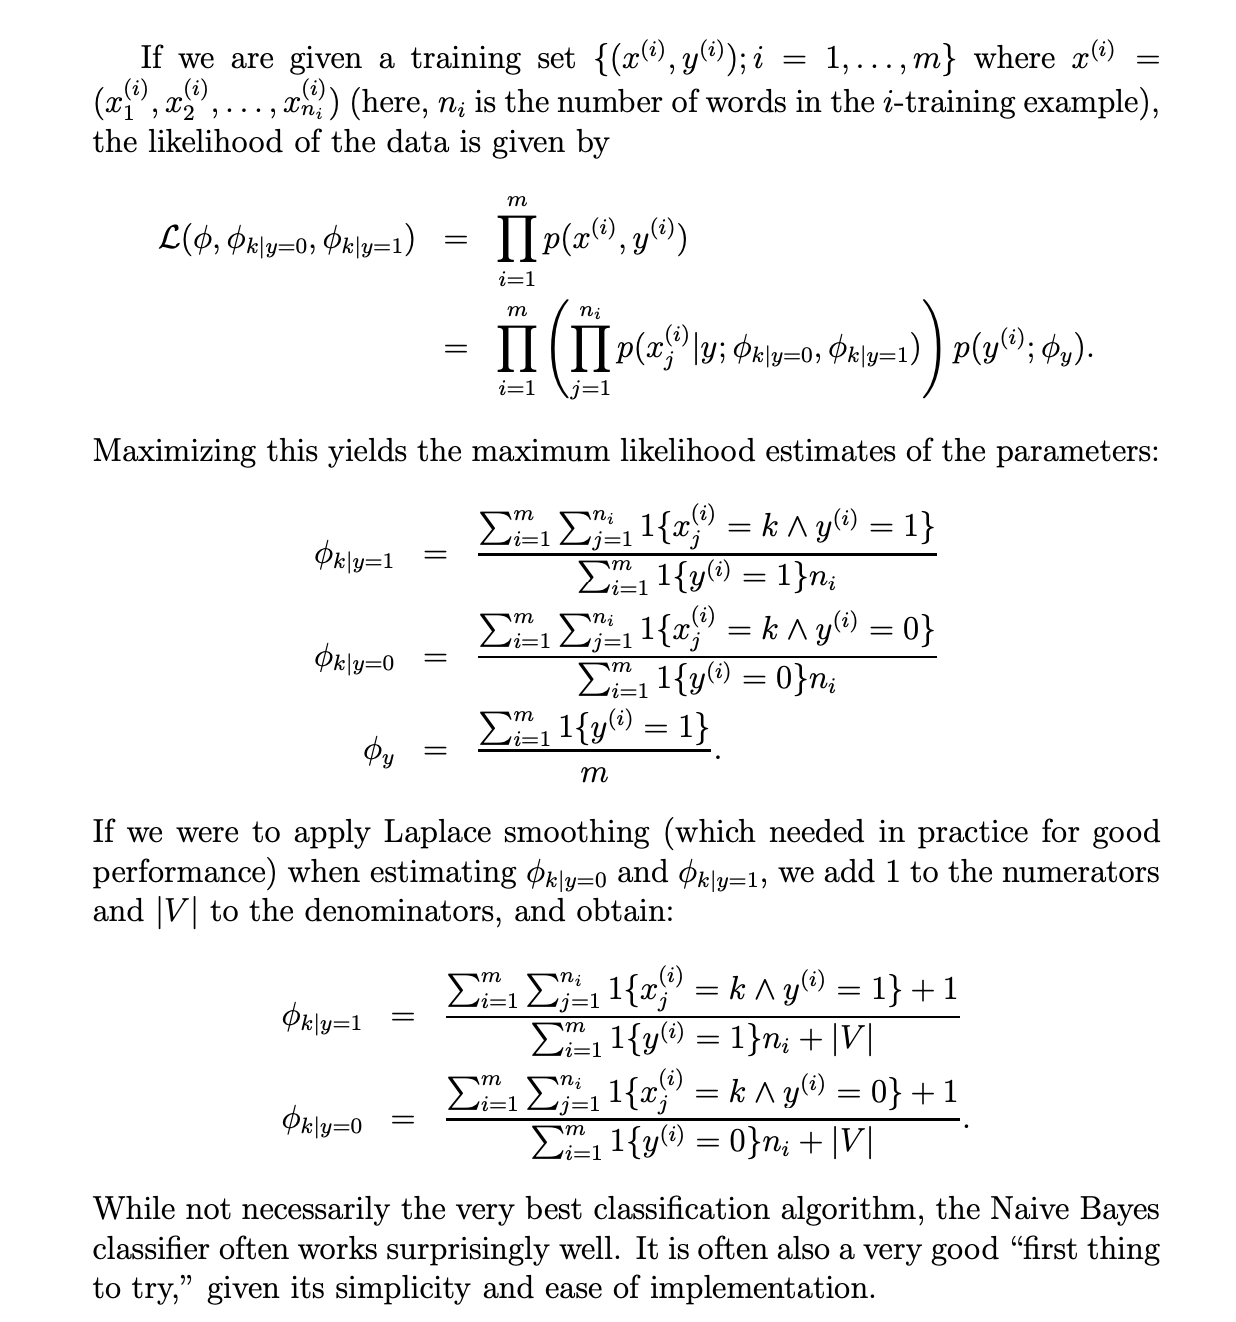

Note: now when we are looking at the MLE parameters, we only care about the word and not its position. For eg: $p(k|y=0)$ gives the probability of word $k$ appearing if the mail is non-spam.

## Support Vector Machine
Suppose, we have a very non-linear decision boundary, then logistic regression or simple classifier models fail to do it. But if we have map our input features to a higher dimension, then they start to learn the nonlinearity. But still they will have some problem, for eg you can identify and ellipse but maybe the boundary is more like crooked wave kinda thing. 

Consider a logistic regression $h_\theta(x) = g(\theta^Tx)$. Now the model will predict "1" if $\theta^Tx \geq 0.5$ (remember Sigmoid function) and will predict "0" otherwise. If we have:
- $y^{(i)}=1$ (positive label), then we hope that $\theta^Tx \gg 0$ 

- $y^{(i)}=0$ (negative label), then we hope that $\theta^Tx \ll 0$. 

So, these two conditions set a nice goal to aim for a setting a decision boundary (i.e they should always hold).

### Notation 
- Labels $y\in \{-1, 1\}$ instead of $\{0,1\}$
- Hypothesis $h_{w,b}(x) = g(w^Tx + b)$  instead of $h_\theta(x) = g(\theta^Tx)$

#### Functional margin 
Functional margin of hyperplane defined by $(w,b)$ w.r.t training data $(x^{(i)},y^{(i)})$ is 

$\hat{\gamma}^{(i)} = y^{(i)}(w^Tx^{(i)} + b)$

- If $y^{(i)} = +1$ $\quad \rm{want} \quad$ $(w^Tx^{(i)} + b) \gg 0$

- If $y^{(i)} = -1$  $\quad \rm{want} \quad$  $(w^Tx^{(i)} + b) \ll 0$

- Overall, we want $\gamma^{(i)} \gg 0$ (for the two conditions)

Now functional margin with respect to whole training set

$\hat{\gamma} = \rm{min}~ \hat{\gamma}^{(i)}$

**NOTE:** Its, very easy to cheat with the $\hat{\gamma}$ parameter, for eg by multiplying weight and biases with a factor of 2. This would change $\hat{\gamma}$ but the decision boundary wouldnt be affected.

#### Geometric margin 
Geometric margin  of hyperplane $(w,b)$ wrt $(x^{(i)},y^{(i)})$ is 

$\gamma^{(i)} = \frac{y^{(i)}\big(w^Tx^{(i)} + b\big)}{||w||}$

In practice, this is the distance of the training example from the decision boundary (orthogonal distance). The geometric margin wrt to whole training set:

$\gamma = \rm{min}~ \gamma^{(i)}$

**NOTE:** while taking the min, we are always finding the worst example of the training dataset. If you think in terms of distance, the worst example are the ones in which points lies very close to the decision boundary. 

So the `relation between functional and geometric margin is` 

$\gamma^{(i)} = \frac{\hat{\gamma}^{(i)}}{||w||}$

### Optimal margin classifier
Choose $(w,b)$ to maximize $\gamma$ (i,e to maximize geometric margin). Now we can rewrite this problem, by using some properties of $\gamma$ along with its relation with the functional margin. Overall, we can write maximizing $\gamma$ problem is same as minimizing $||w||^2$  

So now we have 

$\rm{min}_{w,b} ||w||^2   ~~~~~~~ $   such that    $~~~~~~~~~~ y^{(i)}(w^Tx^{(i)} + b) \geq 1$ 

This can be efficiently solved.

# Lecture 7: Kernel

Coming back to optimal margin classifier, where we want every training example to have geometric margin greater than or equal to $\gamma$ (which is the worst class geometric margin)

i.e $ \max\limits_{\gamma, w,b}  \rm{~~~s.t~~~~~} \frac{y^{(i)} (w^T x^{(i)} + b)}{||w||} \geq \gamma$

Suppose weight can be expressed as a linear combination of training example (which is actually the **`Representer theorem`**)

$w = \sum\limits_{i=1}^m \alpha_i y^{(i)}x^{(i)}$

**Getting back to the optimization problem** 

$\min\limits_{w,b} \frac{1}{2}||w||^2 $   such that    $y^{(i)}(w^Tx^{(i)} + b) \geq 1$ 

- substituting the value of $w$ in $\min\limits_{w,b} \frac{1}{2}||w||^2 $ gives

$ = \min \frac{1}{2}\Big(\sum\limits_{i=1}^m \alpha_i y^{(i)}x^{(i)}\Big)^T\Big(\sum\limits_{j=1}^m \alpha_j y^{(j)}x^{(j)}\Big)$

$ = \min  \frac{1}{2} \sum\limits_{i} \sum\limits_{j} \alpha_i \alpha_j y^{(i)} y^{(j)} \underbrace{x^{(i)^T} x^{(j)}}_{\langle x^{(i)} x^{(j)}\rangle}$

where we are using **`inner product`** i.e $\langle x^{(i)} x^{(j)}\rangle$ :=  $x^{(i)^T} x^{(j)}$ 

- substituting the value of $w$ in $y^{(i)}(w^Tx^{(i)} + b) \geq 1$  gives

$ = y^{(i)}\Big(\big( \sum\limits_{j}\alpha _j y^{(j)} x^{(j)}\big)^Tx^{(i)} + b \Big) \geq 1$

$ = y^{(i)} \Big(\sum\limits_j\alpha_j y^{(j)} \langle x^{(j)} x^{(i)}\rangle + b \Big) \geq 1 $

So the **KERNEL TRICK** `basically lies in computing the inner product between the features` $\langle x^{(j)} x^{(i)}\rangle$ efficiently

We can further simplify the optimization problem as 

$\max \sum\limits_i \alpha_i - \frac{1}{2} \sum\limits_i \sum\limits_j\alpha_i \alpha_j y^{(i)} y^{(j)} \langle x^{(i)} x^{(j)}\rangle$

such that  $\alpha_i \geq 0$  and  $\sum\limits_i y^{(i)}\alpha_i =0$

This is called the **`Dual optimization problem`** 

Way to make prediction 
- Solve for $\alpha_i$'s , b
- make a hypothesis (prediction) using the inner product $\langle x^{(i)} x^{(j)}\rangle$

#### NOTE:
Notation: I will now use $\langle x, z \rangle $ for $\langle x^{(i)} x^{(j)}\rangle$

### Kernel trick 
The recipe is as follows:
- write algorithm in terms of $\langle x^{(i)} x^{(j)}\rangle$
- let there be a mapping from $x \rightarrow \phi(x)$ where $\phi(x)$ is a higher dimensional feature
    - for eg, if you have length and breadth as feature, you can construct $\phi(x)$ by taking the product of length and breadth
    
- find way to compute **`Kernel function`** $K(x,z) = \phi(x)^T\phi(z)$ 
- Replace $\langle x, z \rangle $ in algorithm with $K(x,z)$ (with this you are basically running the learning algorithm on high dimensional feature)

Let $x = \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}$ and we want $\phi(x)= \begin{bmatrix}
x_1x_1 \\
x_1x_2 \\
x_1x_3 \\
x_2x_1 \\
x_2x_2 \\
x_2x_3 \\
x_3x_1 \\
x_3x_2 \\
x_3x_3 \\
\end{bmatrix}$ and similarly $\phi(z)= \begin{bmatrix}
z_1z_1 \\
z_1z_2 \\
z_1z_3 \\
z_2z_1 \\
z_2z_2 \\
z_2z_3 \\
z_3z_1 \\
z_3z_2 \\
z_3z_3 \\
\end{bmatrix}$

Now since the $\phi$ has $n^2$ elements, we need $\mathcal{O}(n^2)$ time to compute $\phi(x)$ or $\phi(x)^T\phi(z)$ explicitly.

#### What if there is a better way?
Note:

$K(x,z) = \phi(x)^T\phi(z) = (x^Tz)^2 $ and now $(x^Tz)$ will have $\mathcal{O}(n)$ computational time, as its just an inner product of n elements.


### Modifying kernel function 
Lets say now, we take the kernel function to be 

$K(x,z) = (x^Tz + C)^2 $ 

where C is some fixed real number. Now the $\phi(x)$ will be modified as $\phi(x)= \begin{bmatrix}
x_1x_1 \\
x_1x_2 \\
x_1x_3 \\
x_2x_1 \\
x_2x_2 \\
x_2x_3 \\
x_3x_1 \\
x_3x_2 \\
x_3x_3 \\
\sqrt{2c}x_1\\
\sqrt{2c}x_2\\
\sqrt{2c}x_3\\
c\\
\end{bmatrix}$.

### Note:
- Basically, the role of the constant term is to get a **trade off between quadratic and linear term (in this case)**. 
- Similarly, you can modify the kernel as $K(x,z) = (x^Tz + C)^d $ with any value of $d$ to get more polynomial terms features 
- Note, the computation time will still be $\mathcal{O}(n)$ 


**`SUPPORT VECTOR MACHINE = OPTIMAL MARGIN CLASSIFIER + KERNEL TRICK`** 
#### <span style="color:red"> A Support Vector Machine (SVM) is a supervised learning algorithm that finds the optimal margin classifier by maximizing the distance between the decision boundary and the nearest data points, known as support vectors. It achieves non-linear classification by implicitly mapping input data into a higher-dimensional space using a kernel function, where linear separation becomes possible.</span>


### How to make Kernel?
- If x and z are 'similar' then $K(x,z) = \phi^T(x)\phi(z)$ is large 
- If x and z are 'dissimilar' then $K(x,z) = \phi^T(x)\phi(z)$ is small 
- as the inner product of similar vector (poiniting in same direction) will be large and vice versa

Based on this, we can write 

$K(x,z) = \exp\Big(-\frac{||x-z||^2}{2\sigma^2}\Big)$

This is the **`Gaussian kernel`** and it turns out that one can prove if $K(x,z) = \phi^T(x)\phi(z)$ then such kernel function exist. 

Most used kernel function is the linear kernel $K(x,z) = x^Tz$ i.e $\phi(x) = x$

Kernel function have to satisfy following property:

$ K(x,x) = \phi^T(x)\phi(x) \geq 0$

### Theorem: 
Let $\{x^{(1)}, x^{(2)}, ...,x^{(d)}\}$ be d points and and let $K' \in \mathbb{R}^{d\times d}$ be the `Kernel matrix`

$K' = K(x^{(i)}, x^{(j)}$ where $K$ is the kernel function

Given any vector $z$, 

$z^TK'z = \sum\limits_{i,j} z_i^T K'_{ij}z_j$

$ \quad \quad =  \sum\limits_{i,j} z_i^T \sum\limits_k (\phi(x^{(i)})_k(\phi(x^{(j)})_k z_j$

$ \quad \quad = \sum\limits_{k} \sum\limits_i \big(z_i\phi(x^{(i)})_k\big)^2$ 

$ \quad \quad \geq 0$

**This implies kernel function is a positive semi-definite**

So the theorem states that 
**K is a valid kernel function i.e $\big( \exists ~~~ \phi ~~~\rm{s.t}~~~ K(x,z) = \phi(x)^T \phi(z) \big)$ if and only if for any d-points $\{x^{(1)}, x^{(2)}, ...,x^{(d)}\}$, the corresponding kernel matrix $K' \geq 0$**


#### NOTE:
- when you go to higher dimensional feature space, the data is linearly separable. 
- but you shouldnt take the advantage of it, and learn about the noise in the dataset


### L1 norm soft margin SVM
This is further modification to basic SVM. Now we want to minimize 

$\min ~~~ \frac{1}{2}||w||^2 + C\sum\limits_{i=1}^m \xi_i$

such that $y^{(i)}(w^T x^{(i)} + b) \geq 1 - \xi_i$ for every $i = 1, \dots , m$

This leads to a constrain on $\alpha_i$ (based on the representor theorem) which is 

$0\leq \alpha_i \leq C$


# Lecture 8: Data Splits, Models and cross validation

**underfit** --> high bias (bias in the sense that model thought this relationship between feature and target is true but it isnt the case)

**overfit** --> high variance (model overfitted the data, by capturing almost each and every point. Now if you have a slighlty different set of data, then the model would be data, so high variance)

**high bias and high variance** --> if model is very complicated and still not able to fit the training data well.

### Regularization
**Regularization is a tool to avoid overfitting**

for linear regression we try to minimize 

$\rm{min}~{\theta}: \frac{1}{2}\sum_{i=1}^m||  y^{(i)}- \theta^Tx^{(i)}||^2 + \frac{\lambda}{2}||\theta||^2$

where $ \frac{\lambda}{2}||\theta||^2$ is the regularization term, which penalizes for $\theta$ being too big and hence make it harder for the learning algorithm to overfit the data. There needs to be optimal value of $\lambda$ too, for eg if  $\lambda = 0$ implies no regularization, a high value of $\lambda$  will lead to underfitting 


## NOTE:
even though in SVM, we go to infinite dimensional space for classification problem, we are hardly overfitting. The reason is while dealing with SVM, we are always trying to have kernel such that we maximize the $\gamma$ the geometric margin or minimize the $||w||^2$. And one can prove that minimizing $||w||^2$ has a similar affect to using $\frac{\lambda}{2}||\theta||^2$ terms while regularizing.

# Lecture 9: Approx/Estimation & ERM

- we have a set of data (distributed into training and test set) and we assume that all this data has been sampled from the same distribution function D
- And these samples are independent. 
- So we input random variable (S) which goes through a learning algorithm and returns a hypothesis $(\hat{h}_\theta)$
    - here, learning algorithm is a deterministic function.
    - learning algorithm is also called `Estimator`
    - and if the input of deterministic function is random variable, the output is also a random variable.
- Bias and variance are the first and second moment of your ouput sampling distribution. 
    - Bias tells how much the value is centered around the 'true' value $(\theta^*)$. 
        - low bias means the value is centered around true value 
        - high bias means the value is off centered from true value 
    - Variance tells the spread of data.
        - Note, spread (variance) is a function of number of data. It decreases with increase in the size of input $(m)$ 
        - If $m \rightarrow \infty$, then $\rm{Var}[\theta]\rightarrow 0$ `Statistical efficiency`
        - If $m \rightarrow \infty$ and $\hat{\theta} \rightarrow \theta^* $, then algorithm is consistent. 
    - if expectation value of $\theta$ i.e $E[\hat{\theta}] = \theta^* $ for any value of input size $m$, then the estimator is called `unbiased estimator`.  
    
    - There is no correlation between bias and variance. 
    - Note: if an algorithm has a high bias, its kinda impossible to bring it close true value. Variance is how the data gets affected by the noise, and will become better if you increase the dataset. 
    - You can also add regularization to reduce variance. 
    

Now, lets assume we gave a space of hypothesis $\mathcal{H}$ and g is the best possible hypothesis, which is outside the class of hypothesis (it can be inside too). Also,
    - $h^*$ best in class of hypothesis $\mathcal{H}$
    - $h$ is hypothesis learnt from finite data
- $\epsilon(h)$ is `Risk or generalization error` defined as

     $\epsilon(h) = E_{(x,y)\sim D}[\mathbb{I}\{ h(x) \neq y\}]$
     
which basically tells about the fraction of data on which we made a mistake.
- $\hat{\epsilon}_s(h)$ is called `empirical risk` defined as

 $\hat{\epsilon}_s(h) = \frac{1}{m}\sum_{i=1}^m[\mathbb{I}\{ h(x^{(i)}) \neq y^{(i)}\}]$
 
### NOTE 
Empirical risk measures model performance on training data, while generalization error estimates performance on unseen data sampled from the same distribution $D$. Minimizing empirical risk does not guarantee low generalization error; overfitting can lead to low empirical risk but high generalization error. The goal in machine learning is to reduce generalization error by building models that generalize well to new data.

- $\epsilon(g)$ is `Bayes error or Irreducible error`. If we take the best possible hypothesis, what is the rate at which we make an error. For eg. if for some unknown reason, the same values of features $x$ gives two different output in the training data, then the best possible hypothesis will always have error in this scenario.

- $\epsilon(h^*) - \epsilon(g)$ is `Approximation error` this tells you about the cost you are paying for restricting yourself to a hypothesis class (for eg, for deciding that you will be working with ML, NN, or ...)

- $\epsilon(\hat{h})- \epsilon(h^*)$ is `Estimation error` given the data, what's the error due to estimation (error due to limiting data, or some nuance of the algorithm, model complexity ,...)

### NOTE 
- $\epsilon(\hat{h}) = $ Estimation error $+$ Approximation error $+$ Irreducible error

- Estimation error  can be further classified into `estimation bias` and `Estimation variance`
- Total bias $=$ Estimation bias $+$ Approximation error (as approximation error also comes from being biases towards a class of hypothesis)

-  $\epsilon(\hat{h}) = $ Estimation variance $+$ Bias $+$ Irreducible error


## Fighting bias and variance
- making class of hypothesis $\mathcal{H}$ bigger will reduce bias. But it can result in increasing variance (as the spread of output parameter $\theta$ will increase now). This is due to `bias-variance tradeoff`
- adding regularization to reduce variance.  
- Increasing the dataset size will reduce the variance too 


## Empirical Risk Minimizer (ERM)
is a very specific type of learning algorithm. Lets say that the hypothesis, we get from ERM is $h_{ERM}$. Then, 

$h_{ERM} = \rm{argmin} ~_{h\in \mathcal{H}}~~\frac{1}{m}\sum_{i=1}^m [\mathbb{I}\{h(x^{(i)} \neq y^{(i)}\}]$. 

ERM stands for "Empirical Risk Minimization." It's a principle in machine learning where the aim is to minimize the empirical risk, or the error on the training data, with the expectation that this will also lead to a low generalization error, or error on unseen data. ERM is a fundamental concept guiding the training of machine learning models, where optimization algorithms adjust model parameters to reduce the observed error on the training set.

We want to know the uniform convergence between
- Empirical risk $\hat{\epsilon}(h)$ and risk/generalization error $\epsilon(h)$
- $\epsilon(\hat{h})$ and $\epsilon(h^*)$ (i.e error from best in class hypothesis)

**For knowing this convergence, we will be needing two tools:**
1. `Union bound` 
    - let $A_1, A_2, \dots A_k$ be n events which need not be independent. Then, from properties of probabilities
    - $P(A_1 \cup A_2 \cup \dots \cup A_k) \leq P(A_1) + P(A_2) + \dots P(A_k)$
2. `Hoeffding's inequality`
    - Let $Z_1, Z_2, \dots Z_m$ be distributed from Bernoulli distribution with parameter $\phi$
    - $\hat{\phi} = \frac{1}{m}\sum_{i} Z_i$
    - Let there be $\gamma$ called margin which is greater than 0. 
    - Hoeffding's inequality states the relation between deviation of the estimated value $\hat{\phi}$ from the true value $\phi$
    
        $P[|\hat{\phi}- \phi| > \gamma] \leq 2 \exp(-2 \gamma^2 m)$

# Lecture 10: Decision Tee and Ensemble Method

## Decision Tree
- Classfying technique based on the split model
- Uses `Greedy, top-down, recursive` partitioning
    - top-down: starting with the overall region and slowly partition it up
    - greedy: because at each step want to take best partition possible 
    
Suppose we have a region $R_p$ and we are looking for a split $S_p$

$S_p(j,t) = \big( \{ \underbrace{X| X_j <t, X\in R_p}_{R_1}\},  \{ \underbrace{X| X_j \geq t, X\in R_p}_{R_2}\}\big)$
where $j$ is the feature and $t$ is the `threshold`. 

### How do we choose the split?
Define misclassification loss of $R$ i.t $L(R)$. Given $C$ classes, define $\hat{p}_c$ to be the proportion of examples in R that are of class $c$

$L_{\rm{misclass}} = 1 - \max\limits_{c} \hat{p}_c$
                
Once, we have a split, we want to minimize the loss between parent and daughter classes 

$\min\limits_{j,t} ~ L(R_p) - (L(R_1) + L(R_2))$

**Misclassification loss has issues**

Suppose we have parent class $R_p$ with 900 positives and 100 negatives, and we make two different kind of splits 
- First possible split 
    - $R_1 =$ 700 positives and 100 negatives
    - $R_2 =$ 200 positives and 0 negatives
- Second possible split
    - $R_1 =$ 400 positives and 100 negatives
    - $R_2 =$ 500 positives and 0 negatives
- In both the situation, we see that the misclassification loss is same $L(R_p) - (L(R_1) + L(R_2)) = -100$, which makes it insenstive to the classification. It is intuitive and simple but it lacks sensitivity to changes in the predicted probabilities.

**Therefore, we use `cross-entropy loss`**

$L_{\rm{cross}} = - \sum_{c}\hat{p}_c\log \hat{p}_c$
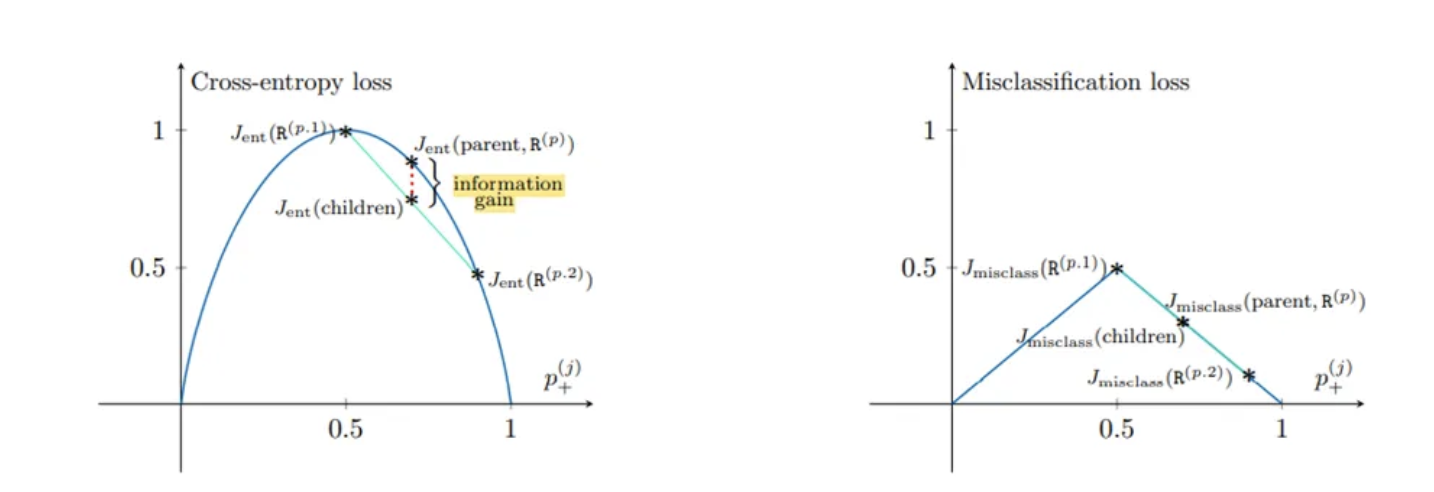

The above graphs are plotted with the assumption of an even split of data into two nodes. The cross-entropy function has concave nature that proves the loss of children is always less than that of the parent. But this is not the case with the misclassification error. Hence the children and parent loss are equal.


**Another one is `Gini impurity`** 

$L_{\rm{cross}} = - \sum_{c}\hat{p}_c (1- \hat{p}_c)$

which also has a stricitly concave curve, and hence will always have some information gain

## Regression trees
Decision tree for the regression problem. 
- Classify it into small regions $R_m$, where m are various regions.
- predict the mean of the values in various classified region 
- So the predicted target would be $\hat{y}_m = \sum\limits_{i\in R_m}\frac{y_i}{|R_m|}$
- Then the loss is given as 
   $L_{\rm{squared}} = \sum\limits_{i\in R_m}\frac{(y_i-\hat{y}_m)^2}{|R_m|}$

### NOTE:
- We can also deal with categorical variables in decision tree
- If we have $q$ categories, then the number of possible split would be $2^q$
- **decision tree can easily lead to overfitting by making best split all the way to the end**. Hence are called high variance models.

### Regularizing decision tree
- minimum leaf size 
- maximum depth
- max number of nodes
- min decrease in loss (if we didnt gain any information from splitting, then stop it)
- Pruning (cutting down the nodes) by using validation set along with misclassification.

### Problem with DT: No additive structure
When referring to the "additive structure" in the context of decision trees, it typically means that decision trees do not directly model additive relationships between features. 

In simpler terms, a decision tree splits the feature space into regions based on individual features, but it doesn't explicitly model how the effects of different features combine in an additive manner to influence the outcome.

For example, in a linear regression model, if Feature A has a positive effect on the outcome and Feature B has a negative effect, the combined effect of having both features present could be represented as the sum of their individual effects (i.e., an additive relationship). Decision trees don't inherently model relationships in this additive way.

Instead, decision trees make predictions by considering one feature at a time and splitting the data based on threshold values of that feature. This can make it more challenging for decision trees to capture complex relationships where the effects of features interact in a non-additive manner.


### Recap 
- Pros:
    - Easy to explain 
    - Interpretable 
    - Can deal with categorical values 
    - fast
- Cons:
    - High variance
    - bad at looking at relationship between features 
    - low predictive accuracy (for validation and test data)
    
But they can be made extremely powerful using `ENSEMBLE METHOD`

## Ensembling
Take $X_i$'s which are random variables that are indepent identically distributed (iid)

$\rm{Var}(X_i) = \sigma^2$

we can show variance of mean of these variables is 

$\rm{Var}(\bar{X}) = \rm{Var}\Big(\frac{1}{n}\sum\limits_{i} {X_i} \Big) = \frac{\sigma^2}{n}$

i.e taking the mean decreases the varaince of the model.

Let's say we drop the independent assumption. So now we $X_i$'s are identically distributed (id). Let $\rho$ capture the correlation between $X_i$'s/ 

$\rm{Var}(\bar{X}) = \rho \sigma^2 + \frac{1-\rho}{n}\sigma^2$

### NOTE:
Based on this **`we want, as many different model to increase n and also want to make these models as decorrelated as possible to reduce`** $\rho$

### Ways to ensemble
- different algorithms : like using SVM, NN, ... but it would be tiresome ❌
- different training sets: where do you get more training set from? ❌
- Bagging (Random forest)
- Boosting (Ada boost, Xgboost)


## Bagging - Bootstrap aggregation 
**Bootstrap is a statistical method to measure uncertaininty** 
Lets say, we have a true population P, and training set $S\sim P$. So, we generate different bootstrap sample $Z$ from our training set.

**`Take different bootstrap sample, train different models on each and then aggregate their outputs`.**

Formally speaking, 
- bootstrap sample $Z_1, Z_2, ..., Z_M$
- train model $G_m$ on $Z_m$
- $G(m) =  \frac{\sum_{m=1}^MG_m(x)}{M}$

Looking at bias-variance analysis
$\rm{Var}(\bar{X}) = \rho \sigma^2 + \frac{1-\rho}{M}\sigma^2$

- Bootstapping is driving down $\rho$
- More M $\implies$ less variance
- Bias slightly increased (because by increasing the number of sub-samples, we have less input for each model, hence each model would be less complex and that would result in an increase in bias).
- But decrease in variance is more compared to increase in bias


### Decision tree + Bagging 
- DT are high variance low bias, so ideal fit for bagging. 

### Random forest
At each split, consider only a fraction of your total features. 
- Decreasing $\rho$


## Boosting
- Decrease bias of the model. 
- Additive : Train one model and then add the prediction to the other model
- Use weight to correct the mistake of previous model

Determine for classifier $G_m$ a weight $\alpha_m$ proportional to $\log\big( \frac{1- \rm{err}_m}{\rm{err}_m}\big)$ ( this equation is used in `Adaboost`)


$G(x) = \sum_{m}\alpha_m G_m$ i.e each $G_m$ trained on reweighted training set.

# Lecture 11: Neural network

## Deep Learning:
**subset of machine learning, is a set of technique which deal withs computer vision, language processing and speech recognition.**
- new computational methods (to parallelize and optimize the code)
- data available 
- new algorithms


## Logistic regression 
Lets start with the logistic regression and out **goal is to identify a cat in the pictures** $\begin{cases} 1 \xrightarrow \rm{presence ~ of ~ cat }  \\ 0   \xrightarrow \rm{absence ~ of ~ cat }  \end{cases} $

If we have color images with dimensions of $64 \times 64$ pixels, and each pixel is represented in a matrix format, we would need a matrix of size $64 \times 64 \times 3$ to represent each image. Now we flatten this into a column-vector to be used by logistic regression. For logistic regression, we will use weight, and biases, along with sigmoid function to predict if the cat is available in the image. 

Now, the weights will turn out to be a row vector with dimension of $(1, 64 \times 64 \times 3)$

These are the steps that goes into a logistic regression:
- initialize $w, b$
- find the optimal values of $w, b$
    - define the loss function (based on the maximum likelihood estimation) and then use gradient descent to update $w,b$
- Use $\hat{y} = \sigma (wx+b)$ to predict

Total number of parameter  =  $64 \times 64 \times 3 $ (weight) + 1(bias) = 12289


Two main things to remember :
- neuron = linear + activation 
- model = architecture + parameter 


### New goal : 
**Find cat, lion and iguana in images.**

Again, we will have same input vector, but now we will have 3 neurons in the first layer that are connected to all the inputs. Lets represent those neuron by $a_i^{[1]}$ where $i=1,2,3$ and each neuron outputs $\hat{y}_i = a_i^{[1]} = \sigma(w_i^{[1]} x + b^{[1]}_i)$.

Note that, in this layer **neurons arent communicating with each other**.

Now total number of parameters =   $\big(64 \times 64 \times 3 $ (weight) + 1(bias) $\big) \times 3$

In order to train this logistic regression network, we need 
- images and labels 
- one hot encoding label to represent cat, lion and iguana
- now each neuron in the first layer has a responsibility to detect each animal in the image, 
- as the neurons are not talking to each other, the network would be robust to detect all three animals (if provided) in the same image.
- so the atm, we can think of our network as three different logistic regression and each of task of identifying the assigned animal to it. (for eg neuron 1 is for cat)



### New goal: 
Constraint: unique animal in a image

- now lets, say our neuron is only composed of linear part and has no activation 
    - using $z_i^{[1]}$ instead of $a_i^{[1]}$
- using `Softmax activation` to get the probablistic distribution (ie the probability of cat + probability of lion + probability of iguana = 1)
    - output of neuron would be $\frac{e^{z_i^{[1]}}}{\sum_{k=1}^3e^{z_k^{[1]}}}$
    
    
### NOTE:
lets say now we want to get the age of cat, then these are changes we need to implement
- use linear regression 
- use `Relu (rectified linear output)` instead of softmax to get a positive number and not probability distribution
- replace cross entropy loss with RMSE or some regression type loss


## Neural Network
**Goal 1.0: identify presence or absence of cat** 

- taking three layers of neurons instead of 1 (as in case of logistic regression) 
- `Layer`: cluster of neuron not connected to each other 
- lets say we had 3 neurons in first layer, 2 neurons in second layer and 1 in the final layer 
- **NOTE**: the final layer always has same number of neurons as the different classification available (1 only becuase we have a binary classification: cat or not cat) and always 1 for regression output. 
- Total number of parameter would be : $(3\times n + 3) + (2 \times 3 + 2) + (2 \times 1 + 1)$, where n is $64x64x3$


How neural network works:
- first layer identifies the fundamental concept of images (which are the edges)
- second layer learns from the first layer and identifies the pattern found from those images (more details)
- next layer combines these information to get the full picture to predict cat or not cat.


### NOTE:  
- Neural network is sometime referred as `end-to-end` learning as we are just training based on the inputs and outputs.


### Propagation equation
$z^{[1]} = w^{[1]} x + b^{[1]}$ 

$a^{[1]} = \sigma (z^{[1]})$ 

$z^{[2]} = w^{[2]} a^{[1]} + b^{[2]}$

$a^{[2]} = \sigma (z^{[2]})$ 

$z^{[3]} = w^{[3]} a^{[2]} + b^{[3]}$

$a^{[3]} = \sigma (z^{[3]})$ 

We can identify the shape of these matrices as 
- x has a shape of (n,1)
- $w^{[1]}$ has a shape of (3, n) as 3 neurons 
- $z^{[1]}$ will have a shape of (3, 1) 
- $a^{[1]}$ will have a shape of (3, 1) too as activation function dont modify the shape of input
- $w^{[2]}$ has a shape of (2, 3) as 2 neurons (simple matrix multiplication), ... 


**What happens for an input batch of $m$ examples?**

$X = \Big(x^{(1)}, x^{(2)}, ... x^{(m)}\Big)$

#### NOTE:
- $[]$ are for layers 
- $()$ are for m-the image. 

Now lets use $Z$ for the output of each neurons, so the first propagation equation would be

$Z^{[1]} = W^{[1]} X + b^{[1]}$ 

- $X$ has a shape of (n, m)
- $Z^{[1]}$ will have a shape of (3, m) as m examples are there 
- $W^{[1]}$ has a shape of (3, n) as 3 neurons 

- $b^{[1]}$ will still be (3,1)

**So, we see that changing the number of input doesnt modify the shape of weight matrix** i.e number of parameter wont change. 

### Problem:
we see that, we have an algebraic problem here: we are adding a matrix of size (3,m) to matrix of size (3,1). This is solved using `Broadcasting`.

Here, we dont increase the number of parameters, but we still want to do the addition. So we `repeat the bias with 3 values` - m times to form a matrix of (3,m). Lets call the new bias-matrix $\tilde{b}^{[1]}$



### Optimization 
Optimizing $W^{[1]},W^{[2]}, W^{[3]}, b^{[1]}, b^{[2]}, b^{[3]}$

- define loss/ cost function 
    - usually, loss when there is 1 example in the batch 
    - cost when there are several examples.
- Cost function $J(\hat{y},y)$

    $J(\hat{y},y) = \frac{1}{m}\Sigma_{i=1}^m \mathcal{L^{(i)}}$
    
- Loss function (here example of binary classification)

    $\mathcal{L^{(i)}} = -[y^{(i)}\log \hat{y}^{(i)} + (1-y^{(i)}) \log(1-\hat{y}^{(i)}]$
    
    
- once, we know the form of loss function, we can compute $\frac{\partial J}{\partial W^{(i)}}$ or $\frac{\partial \mathcal{L}}{\partial W^{(i)}}$

### Backward propagation 
For 3 layers $(l=1,2,3)$, we want to optimize 

$w^{[l]} = w^{[l]} - \alpha \frac{\partial J}{\partial w^{[l]}}$ 

$b^{[l]} = b^{[l]} - \alpha \frac{\partial J}{\partial b^{[l]}}$ 


now, to optimize the weights and biases in first layer, we need the chain rule and need to know the derivative of cost/loss function with respect to weight and biases in successive layer. Hence its a backward propagation. You start with the last layer, get the derivatives $\frac{\partial \mathcal{L}}{\partial w^{(3)}}$, and then go to one previous layer to calculate $\frac{\partial \mathcal{L}}{\partial w^{(2)}}$ (using chain rule) and then got to the first layer, to calculate $\frac{\partial \mathcal{L}}{\partial W^{(1)}}$

$\frac{\partial \mathcal{L}}{\partial w^{(2)}} = \frac{\partial \mathcal{L}}{\partial z^{(3)}}  \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial z^{(2)}} \frac{\partial z^{(2)}}{\partial w^{(2)}} $

# Lecture 12: Backprop & Imporving NN

Before calculating $\frac{\partial \mathcal{L}}{\partial w^{[l]}}$, note the relation between $a^{[l]}, w^{[l]}$ and $z^{[l]}$

for eg. for $\frac{\partial \mathcal{L}}{\partial w^{[3]}}$, we can start by noticing 

- $\mathcal{L}$ contains $\hat{y}$ which comes from $a^{[3]}$ 
- Now we see the relation $a^{[3]} \rightarrow z^{[3]} \rightarrow w^{[3]}$ 
- so based on this, we can use chain rule to write

 $\frac{\partial \mathcal{L}}{\partial w^{[3]}} = \frac{\partial \mathcal{L}}{\partial a^{[3]}} \frac{\partial a^{[3]}}{\partial z^{[3]}} \frac{\partial z^{[3]}}{\partial w^{[3]}}$
 
- now compute the derivative of sigmoid function $f(x) = \frac{1}{1+e^{-x}}$ to get $\frac{\partial a^{[3]}}{\partial z^{[3]}}$
- remember the propagation equation to obtain other terms in chain rule
- Once you have the result, write down the dimension of every term. We know the final result $\frac{\partial \mathcal{L}}{\partial w^{[3]}}$ should have dimension of $w^{[3]}$, so rearrange terms to be able to do matrix multiplication. You would be using transpose of some terms (in this scenario)

- now use the same trick to compute $\frac{\partial \mathcal{L}}{\partial w^{[2]}}$ and $\frac{\partial \mathcal{L}}{\partial w^{[1]}}$


### Taking derivative of activation function 
- in `the saturation part of sigmoid and tanh function`, the derivative would be very small, so the network will have problem with updating the weights and biases. 

- ReLU doesnt have this problem, so we use ReLU mostly.


#### NOTE: 
**we cannot take identity function as activation funtion because no matter how deep your network is, it will turn out to be linear regression. The complexity of the function comes out from the activation function.**

See it by replacing sigmoid in the above propagation function with identity, 
- so your $a^{[l]}$ would be same as $z^{[l]}$
- can write 

    - $\hat{y} = w^{[3]}w^{[2]}(w^{[1]} x + b^{[1]}) + w^{[3]}b^{[2]} + b^{[3]} = WX + B$
    - where $W = w^{[3]}w^{[2]}w^{[1]}$
    - and $B = w^{[3]}w^{[2]}b^{[1]} + w^{[3]}b^{[2]} + b^{[3]}$


#### NOTE: 
- **Normalizing your input** 
    - one can normalize the input by dividing by the variance, in this way, the data will always be centred around origin
    - if you normalize wrt mean, then it will be centred around origin, but the shape of normalized distribution still follows the original distribution. For eg, if we had a cluster of data that looked like an ellipse, the normalized distribution will look like ellipse too, whereas for variance case, it will look like a circle. 
    - `circle is better than ellipse, when it comes to gradient descent`. Because when we try to minimize our loss function, the steeper slope in case of circle is always pointing toward center. Hence circle is more effective 
    - **NOTE**: the mean and variance are computed from the training set, and should be used as it is, in validation and test set. 
    
- **Normalizing your weights**
    - if weights are very small, we run into `vanishing gradient problem`
    - if weights are very large, we run into `exploding gradient problem`
    - in order to not run into these two problem, we initialize the weights based on the number of neurons $n$, so initial weights are taken to be $1/n$  along with some randomness. 


### Optimization 
- the stochastic gradient descent provide quick update for small dataset
- batch gradient descent is cool because you can use `vectorization` i.e use power of parallelization 
- so one normally trades between the too, and use `MINI-BATCH Gradient descent` 
- `GRADIENT DESCENT + MOMENTUM ALGORITHM`:
    - momentum allows you to look at the past, such that it reduces the number of iteration needed for optimizing weights. Imagine you are in hyper surface, and you want to reach toward the global minima, with momenta, it will try to figure out going in which direction, will make it faster to reach the global minima, (i.e maybe we have to take small steps in one direction compared to another)

# Lecture 13: Debugging ML model and error analysis

#### Cases:
- if by increasing the training data, the training error doesnt change (same with test error). That means, the model is not doing good even on training data. $\implies$ HIGH BIAS

- if by increasing the training data, the training error goes down, but test error doesnt change much. That means, the model is overfitting  $\implies$ HIGH VARIANCE

#### Try this:

- try getting more training data -> fixes high variance (if there are more points, the higher order polynomial will not osscilate much. More data allows the model to learn more intricate patterns without fitting noise.)
- try smaller set of feature -> fixes high variance ( reduces overfitting obtained by going to higher order polynomial)
- try larger set of feature -> fixes high bias
- run gradient descent for more iteration -> fixes optimization algorithm
- try newton's method -> fixes optimization algorithm
- use a different value of $\lambda$ -> fixes optimization objective
- try using a SVM -> fixes optimization objective



# Lecture 14: Expectation-Maxmization algorithm 

Studying unsupervised machine learning: mainly used for understanding market segment.


## K-Means clustering 
K-means clustering is an `unsupervised machine learning algorithm used to partition a dataset into K distinct, non-overlapping clusters.` It works by iteratively assigning data points to the nearest cluster centroid and then updating the centroids based on the mean of the data points assigned to each cluster. This process continues until the centroids no longer change significantly or a maximum number of iterations is reached.

The algorithm aims to minimize the within-cluster sum of squares, making clusters compact and well-separated. However, K-means is sensitive to the initial placement of centroids and may converge to a local optimum.

- Data : $\{x^{(1)}, ..., x^{(m)}\}$ with no labels
    - Initialize cluster centroids: $\mu^{(1)}, ..., \mu^{(k)} \in \mathbb{R}^n$ randomly
    - Note: for high dimensional, one can also select k random point from the dataset as the centroid.
- Repeat until convergence
    - set $c^{(i)} = \rm{arg}\min\limits_j ||x^{(i)} - \mu_j||^2$ (for each point in the dataset, choose which centroid it belongs to)
    - for $j=1, ..., k$
    
        $\mu_j = \frac{\sum\limits_{i=1}^m \mathbb{I}\{c^{(i)=j}\}x^{(i)}}{\sum\limits_{i=1}^m \mathbb{I}\{c^{(i)=j}\}}$ (move the cluster centroid)
        
        
- **NOTE**: choice of $k$ is ambigous.


- The cost function for K-means clustering is calculated as the sum of the squared distances between each data point and its assigned centroid. Mathematically, for a dataset with $m$ data points and $K$ clusters, 

    $J = \sum_{i=1}^{m} \min_{j=1}^{K} ||x^{(i)} - \mu_j||^2 $

## Density estimation 
Density estimation is a statistical technique used to estimate the probability density function (PDF) of a random variable from a set of observed data points

**Density estimation can be utilized in anomaly detection by estimating the PDF of the data and then identifying observations that fall into low-density regions of the distribution as anomalies.** One common approach for anomaly detection using density estimation is the Gaussian Mixture Model (GMM), where the data is assumed to arise from a mixture of several Gaussian distributions.

### 1-D example
Suppose we have a dataset which contains point coming from two Gaussians. If we knew which point comes from which Gaussian, it would have been easier to classify. BUT in this case, we dont know this information 

So the `Expectation-maximization algorithm will allow us to fit the model despite not knowing which Gaussian each example come from.`


## Mixture of Gaussian model 
Suppose there a latent (hidden) random variable $z$ and $x^{(i)}, z^{(i)}$ are specified by a joint distibution  

$ P(x^{(i)}, z^{(i)}) = P(x^{(i)}|z^{(i)}) P(z^{(i)})$

where $z^{(i)}\sim$ Multinomial$(\phi)\qquad$    with         $\qquad z\in \{1, \dots k\}$

Then $x^{(i)}$  was drawn from one of k Gaussians depending on $z^{(i)}$

$x^{(i)}|z^{(i)}=j  \sim \mathcal{N}(\mu_j,\Sigma_j)$ 

This is different from Guassian discriminant anlysis (GDA) in following ways
   - We are setting z to be 1 of k values instead of one of two values in GDA based on the labels
   - We have the covariance matrix here instead of variance in GDA
    
Main problem is we have $z^{(i)}$ hidden. If we knew $z^{(i)}$, we could use MLE. 

$l(\phi, \mu, \Sigma) = \sum\limits_{i=1}^{m} \log p (x^{(i)}, z^{(i)}, \phi, \mu, \Sigma)$ 
with 

$\phi_j = \frac{1}{m}\sum\limits_{i=1}^{m} \mathbb{I}\{z^{(i)} = j\}$

$\mu_j = \frac{\sum\limits_{i=1}^{m} \mathbb{I}\{z^{(i)} = j\} x^{(i)}}{\sum\limits_{i=1}^{m} \mathbb{I}\{z^{(i)} = j\}}$


**WAHAT TO DO WHEN THE VALUE OF $z^{(i)}$ IS NOT KNOWN**
### Expectation maximization 
<!-- 
- E-step (guess values of $z^{(i)}$)
    - set $w_jz^{(i)} = P(zz^{(i)} =j | xz^{(i)}, \phi, \mu, \Sigma)$
     -->
     
The Expectation-Maximization (EM) algorithm is an iterative optimization technique used to estimate parameters of statistical models, particularly in situations where there are latent variables (unobserved variables) involved. 

Here's a high-level overview of how the EM algorithm works:

1. **Initialization**: Start by initializing the parameters of the model (e.g., means and covariances of Gaussian distributions) randomly or using some other method.

2. **Expectation Step (E-step)**: Given the current parameter estimates, compute the expected values of the latent variables (the "missing" or unobserved variables). This step involves calculating the posterior probability distribution over the latent variables, given the observed data and the current parameter estimates.

3. **Maximization Step (M-step)**: Given the observed data and the expected values of the latent variables computed in the E-step, update the parameters of the model to maximize the likelihood of the observed data. This step involves finding the parameters that maximize the expected log-likelihood.

4. **Iteration**: Repeat the E-step and M-step until convergence criteria are met. Typically, convergence is achieved when the change in the log-likelihood or the parameters falls below a specified threshold, or when a maximum number of iterations is reached.

The EM algorithm is guaranteed to converge to a local maximum of the likelihood function, but it may not converge to the global maximum. The quality of the solution obtained depends on the initialization of the parameters and the presence of local optima.

EM is particularly useful in situations where there are missing data or incomplete observations, as it allows us to estimate the parameters of the model even when not all variables are observed directly. It's commonly used in clustering algorithms (like Gaussian Mixture Models) and in algorithms for learning probabilistic graphical models.

# Lecture 15: Principal component analysis (PCA)

- PCA is not probabilistic 
- We have data : $\{x^{(1)}, ..., x^{(m)}\} in \mathbb{R}^n$ with no labels (unsupervised learning) and **we want to reduce dimensions from $n$ to $k$**

### Pre-processiong 
- taking mean to zero and standard deviation to one 
    - mean $\mu = \frac{1}{m}\sum x^{(i)}$ 
    - $x^{(i)} \rightarrow x^{(i)} - \mu$
    - variance $\sigma^2_j =  \frac{1}{m}\sum x^{(i)}_j$ (for each feature $j$)
    - normalize $x^{(i)}_j \rightarrow \frac{x^{(i)}_j}{\sigma_j}$

Preprocessing is often necessary before applying PCA for several reasons:

1. **Scaling**: PCA is sensitive to the scale of the variables. Variables with larger scales will dominate the computation of principal components, leading to biased results. Therefore, it's essential to scale the variables to have comparable magnitudes before performing PCA.

2. **Centering**: PCA calculates covariance or correlation matrices, which are affected by the means of the variables. If the variables are not centered (i.e., have non-zero means), the resulting principal components may be biased. Centering the variables by subtracting their means ensures that the principal components capture the variance patterns around the origin.

3. **Outlier Handling**: Preprocessing techniques such as outlier detection and removal or robust scaling methods can help mitigate the impact of outliers on PCA.

4. **Missing Data Handling**: Depending on the nature of the missing data, techniques such as imputation or removal of incomplete observations may be necessary.

5. **Categorical Variables**: If the dataset contains categorical variables, they need to be encoded into numerical format (e.g., one-hot encoding) before PCA can be performed.



### Intuition 
- PCA aims to find a new basis (principal components) in the original feature space such that when the data is projected onto these components, the sum of the squared distances between each data point and its orthogonal projection onto the new axes is minimized.

- Another intuition behind PCA is to find new axes (principal components) such that when the data is projected onto these axes, the projected data points spread out as much as possible. This spreading of the projected data points maximizes the variance along the principal components, ensuring that the most information is retained in the lower-dimensional representation.

If the length of vector is 1 i.e $||u||=1$ then length of projection of $x^{(i)}$ onto u is $u^Tx^{(i)}$.

Choose u to maximize 

$\max\limits_{u: ||u||=1}  \quad \frac{1}{m} \sum\limits_{i}(u^Tx^{(i)})^2 $

$ \quad \qquad = \frac{1}{m} \sum\limits_{i} u^T x^{(i)} x^{(i)^T}u$

$ \quad \qquad = u^T \underbrace{\frac{1}{m} \sum\limits_{i}  x^{(i)} x^{(i)^T}}_{\Sigma} ~~u$


So overall, we have $\max\limits_{u: ||u||=1} ~ u^T\Sigma u $,  ie. **u is principal eigenvalue of $\Sigma$**


### General case 
If we wish to project data to k-dimension. Set $u_1,u_2, \dots, u_k$ to be the top k-eigen vector with $\lambda_1, \dots, \lambda_k$ as corresponding eigen values. 

New representation 

$x^{(i)} \rightarrow (u_1^Tx^{(i)}, u_2x^{(i)}, \dots, u_kx^{(i)}) = y^{(i)} \in \mathbb{R}^k$

In order to get back to the orignal representation 

$x^{(i)} = y^{(i)}_1u_1 + \dots + y_k^{(i)}u_k$


### Application 
- visualization (project from n-D to 2,3 or 4-D data)
- compression of ML efficiency
- Questionable uses 
    - Reduce overfiiting (it would be better to use regularization)
    - outlier detection and matching 
    
## Different Unsupervised learning

**NOTE**: When we say the data "**lives on a lower-dimensional subspace of a higher-dimensional space**," we mean that although the data is represented in a higher-dimensional space, it effectively resides in a lower-dimensional subspace due to inherent constraints, patterns, or relationships within the data.


- **PCA**: when data is not probabilistic and lives on lower dimensional subspace of higher dimensional space
- **Factor analysis**: when data is probabilistic and lives on lower dimensional subspace of higher dimensional space
- **K-means clustering**: when data is not-probabilistic and has clusters
- **Mixture of Gaussian**: when data is probabilistic and has cluster. 


It broadly falls in two categories 
- non-probabilistic (used mostly for visualization and compression)
- model probability distribtion P(x) and it is mainly used for detecting anomaly (once you have PDF, look for example in low-density regions of the distribution )


## Independent component analysis
Used for **cocktail party problem**. The cocktail party problem refers to the task of separating and identifying individual sources of sound in a noisy environment, such as a crowded cocktail party, where multiple people are speaking simultaneously. 

The goal is to separate these mixed signals and recover the original signals corresponding to each source, without prior knowledge of the sources or their characteristics.


**Assumption: assume data was generated from some set of sources.

We imagine that there is data $s \in \mathbb{R}^n$ which is generated from $n$ independent sources (speakers)

$s_j^{(i)}$ is the sound from speaker $j$ at time $i$

We observe $x^{(i)} = A s^{(i)}; $  $x^{(i)} \in \mathbb{R}^n$ and A is an unknown square matrix called the **mixing matrix**


In our cocktail party problem, $s^{(i)}$ is an n-dimensional vector and $s_j^{(i)}$ is the sound that the speaker j was uttering at time $i$. Also, $x^{(i)}$ is an n-dimensional vector and $x_j^{(i)}$ is the reading recorded by microphone j at time i. 


Since voices are overlapping, we have 

$x_j^{(i)} = \sum_{k} A_{jk} S^{(i)}_k$


**GOAL** to find $W = A^{-1}$ so that $s^{(i)} = Wx^{(i)}$ i.e to **recover orginal source from speakers**

where $W$ is the **unmixing matrix** 


### Ambiguities of ICA 
ICA, while powerful, has limitations:

1. **Permutation**: Can't determine the order of sources.
2. **Scaling**: This means that the amplitude or magnitude of the identified independent components (sources) may not match the original sources. In other words, ICA can determine the shape or pattern of the sources but not their absolute magnitude.
3. **Nonlinear Mixtures**: Struggles with nonlinear mixtures. Assumes linearity 
4. **Statistical Assumptions**: Assumes independence and non-Gaussianity.
5. **Number of Sources**: Difficult to accurately determine.
6. **Noise Sensitivity**: Sensitive to noise and artifacts.

## K-Nearest neighbour

- supervised machine learning alogrithm 
- based on feature similarity 
- classifies a data point based on how its neighbour are classified
- $k$ is a parameter that tells about the number of nearest neighbours to include.

### Choosing k?
- based on parameter tuning
- if too low -> just too noisy
- if too big -> more computational resources
- Mostly $k = \sqrt{n}$ where n is the total number of data points. 

### when to use KNN?
- data is labeled 
- data is noise free
- dataset is small

### KNN algorithm
- start by calculating distance (lets take Euclidean distance here) of all the point from every other point
- then choose the value of k, and see what is the most frequent label in that cluster. The most frequent label is the label of unknown data points. 
